# Analyse the happiness data
* There is no universally accepted definition of happiness, but there have been some ideas about how it could be measured. Starting in 2012, the World Happiness Report is a nearly annual1 publication by the Sustainable Development Solutions Network to make national metrics available to the public.
* So we need to get all data in this file and I install xlrd at first.
  - `$ pip install xlrd`

In [20]:
import pandas as pd
import numpy as np

df = pd.read_excel('DataForTable2.1WHR2023.xls')
# Removes the rows that contains NULL values
df_clean = df.dropna()

# Part1:

**What is your evaluation of the quality of the data?**
* Dataset has a strong correlation with happiness, and we already have life ladder as happiness score.
* There are 114 countires data in 2022 but only 27 countries in 2005, the dataset may not be balanced, especially for temporal analyses. There are notable limitations in terms of its comprehensiveness and completeness.
* While the dataset spans from 2005 to 2022, covering 18 years. Given the approximate total of 200 countries, one would expect about 3600 data entries (assuming data for each country across all 18 years). The dataset does not meet this expectation, showing a lack of comprehensiveness.
* Observe several outliers across different features but still within a very small range. It's crucial to investigate whether these outliers are due to data entry errors, rare events, or natural variabilities in the data.


In [21]:
df2005 = df[df['year'] == 2005].copy()
df2022 = df[df['year'] == 2022].copy()
num_countries_2022 = df2022['Country name'].nunique()
num_countries_2005 = df2005['Country name'].nunique()
print(f"Number of countries in 2005: {num_countries_2005}")
print(f"Number of countries in 2022: {num_countries_2022}")

Number of countries in 2005: 27
Number of countries in 2022: 114


**How large is the dataset?**
  * The dataset has a memory usage of 189.1+ KB with 2199 entries.

**What are the features (columns) and how are they represented?**
  * There are 11 features and the following table shows all data types of them.
| Feature Name                       | Data Type       | Representation Description                           |
|------------------------------------|-----------------|-----------------------------------------------------|
| Country Name                       | Object (String) | Name of countries                                  |
| Year                               | Integer (int64) | Year of data entry (Range: 2005 to 2022)            |
| Life Ladder                        | Float (float64) | Measure of happiness (Range: 0 to 10) |
| Log GDP per Capita                 | Float (float64) | Logarithmic GDP per capita    |
| Social Support                     | Float (float64) | Measure of social support quality (Range: 0 to 1) |
| Healthy Life Expectancy at Birth   | Float (float64) | Expected healthy lifespan     |
| Freedom to Make Life Choices       | Float (float64) | Measure of freedom in life choices (Range: 0 to 1)|
| Generosity                         | Float (float64) | Measure of altruistic behavior|
| Perceptions of Corruption          | Float (float64) | Measures perceptions of corruption (Range: 0 to 1) |
| Positive Affect                    | Float (float64) | Measure of positive emotional experiences (Range: 0 to 1)|
| Negative Affect                    | Float (float64) | Measure of negative emotional experiences (Range: 0 to 1)|


In [22]:
# Get the size of the dataset and show all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


In [23]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


**Are there any interesting distributions in the (numeric) features?**

* Normal distribution(more likely): Generosity, and Negative affect. Show in the part of univariate analysis.

### Univariate Analysis

<Axes: xlabel='Generosity', ylabel='Count'>

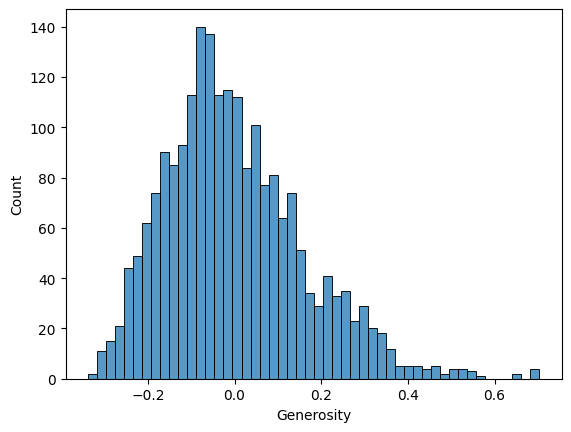

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Generosity'], bins=50)

<Axes: xlabel='Negative affect', ylabel='Count'>

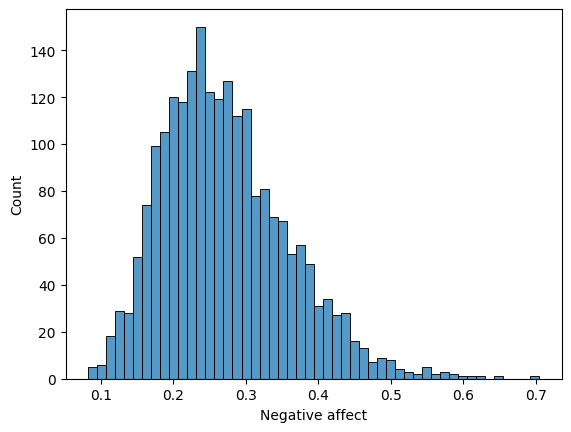

In [25]:
sns.histplot(df['Negative affect'], bins=50)

**Are there any interesting correlations in the data?**
* There are some week positive correlation:(Just show data in 2022)
* 'Life Ladder' has a weak positive correlation with 'Log GDP per capita', 'Healthy life expectancy at birth', and 'Social support'.
* 'Healthy life expectancy at birth' has a weak positive correlation with 'Log GDP per capita'.

* And I found that:
* 'Life Ladder' and 'Healthy life expectancy at birth' have 3 outliers.
* 'Log GDP per capita' and 'Healthy life expectancy at birth' have 3-4 outliers.
* 'Social support' and 'Healthy life expectancy at birth' have 3-4 outliers.

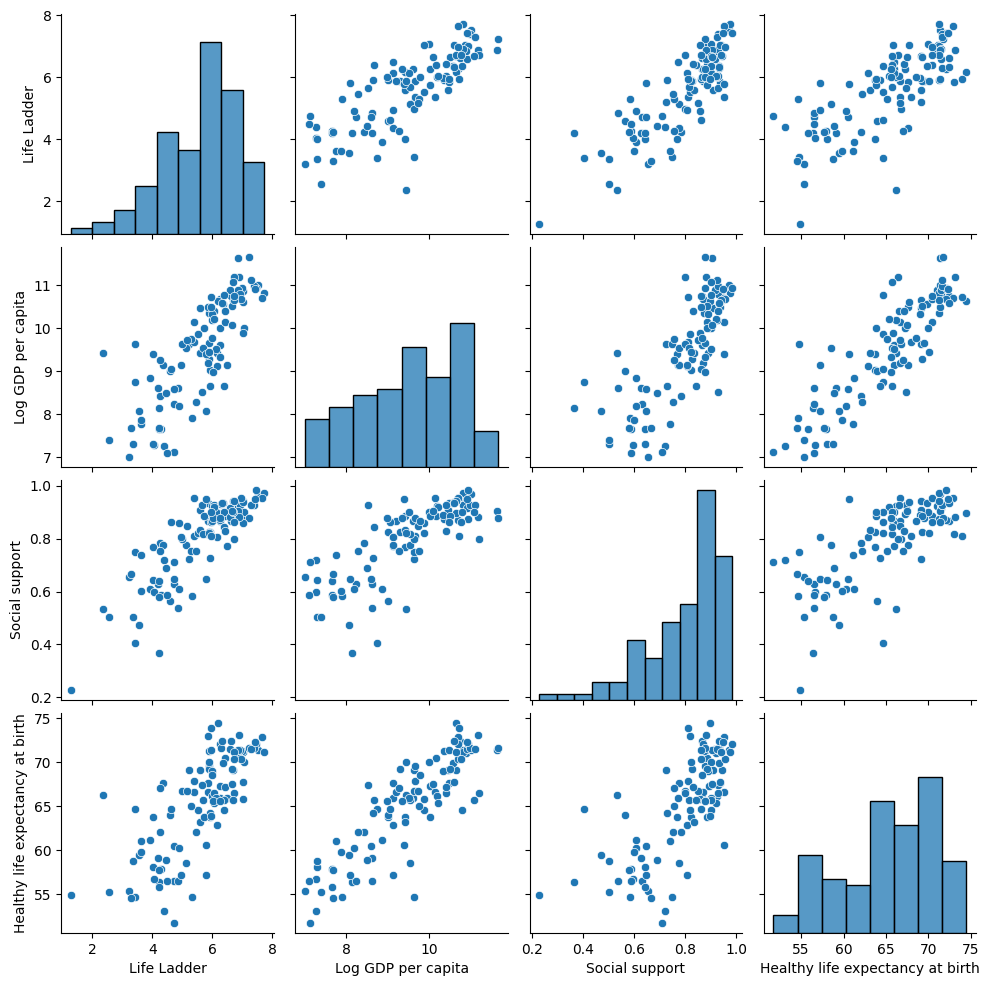

In [26]:
df2022 = df[df['year'] == 2022].copy()
sns.pairplot(df2022[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])

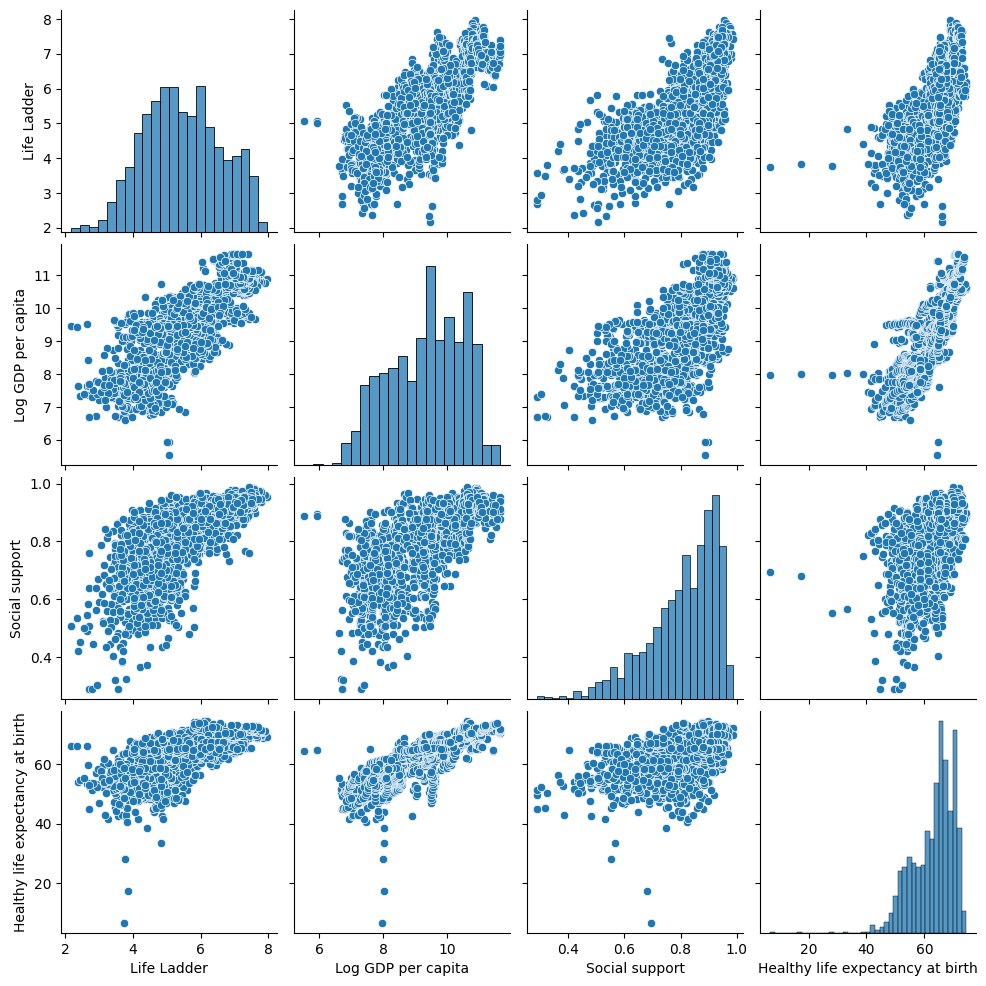

In [27]:
sns.pairplot(df_clean[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])

**Can you identify any limitations, missing values or distortions of the data?**
 * There are notable limitations in terms of its comprehensiveness and completeness. While the dataset spans from 2005 to 2022, covering 18 years. Given the approximate total of 200 countries, one would expect about 3600 data entries (assuming data for each country across all 18 years). The dataset does not meet this expectation, showing a lack of comprehensiveness.
* If I clean the dataset and remove all data with null values, the dataset only has 1958 entries(df has 2199 entries, so I delete around 10% entries)

In [28]:
clean_len = len(df_clean)
clean_len

1958

**What would you like to see in this dataset?**

<h5>
    I'd like to see the correlation of these 11 features. I know that several of them have weak positive correlations, and 'Negative affect' has weak negative correlations with some features. 
    These data are actually very consistent with our common understanding. For example, these weakly positively correlated features, such as 'Life Ladder' has a weak positive correlation with 'Log GDP per capita', 'Healthy life expectancy at birth', and 'Social support'. They all promote increased happiness and are relevant.
</h5>

# Part2:
**What is the happiest country in 2023?  In 2013?**

In [29]:
df_2022 = df[df['year'] == 2022].copy()

# Find the country with the maximum life ladder value in 2022
happiest_country_2022 = df_2022[df_2022['Life Ladder'] == df_2022['Life Ladder'].max()]['Country name'].iloc[0]

happiest_country_2022

'Finland'

 **In 2013?**

In [30]:
df_2012 = df[df['year'] == 2012].copy()

happiest_country_2012 = df_2012[df_2012['Life Ladder'] == df_2012['Life Ladder'].max()]['Country name'].iloc[0]

happiest_country_2012


'Switzerland'

**Of all time?**

In [31]:
df2 = df.copy()

max_happiness_row = df2[df2['Life Ladder'] == df2['Life Ladder'].max()]

happiest_country_alltime = max_happiness_row['Country name'].iloc[0]

happiest_country_alltime

'Denmark'

**What is the least happy country in 2023, 2013 and of all time?**

In [32]:
least_happy_country_2022 = df_2022[df_2022['Life Ladder'] == df_2022['Life Ladder'].min()]['Country name'].iloc[0]
least_happy_country_2022

'Afghanistan'

In [33]:
least_happy_country_2012 = df_2012[df_2012['Life Ladder'] == df_2012['Life Ladder'].min()]['Country name'].iloc[0]
least_happy_country_2012

'Syria'

In [34]:
least_happy_country_alltime = df2[df2['Life Ladder'] == df2['Life Ladder'].min()]['Country name'].iloc[0]
least_happy_country_alltime

'Afghanistan'

# Part3:
**Of the countries in this dataset, which country had the largest increase in happiness from its start of participation to 2023?**

In [35]:
# df_2005 = df[df['year'] == 2005].copy()

df2['Life Ladder']

df_first_year = df2.groupby('Country name').agg({'year': 'min'}).reset_index()
df_first_year = df_first_year.merge(df2, left_on=['Country name', 'year'], right_on=['Country name', 'year'], how='left')

df_last_year = df_2022[['Country name', 'Life Ladder']].copy()

df_increase = df_first_year.merge(df_last_year, on='Country name', suffixes=('_first', '_2022'))
df_increase['happiness_increase'] = df_increase['Life Ladder_2022'] - df_increase['Life Ladder_first']
happiness_increase_sorted = df_increase.sort_values(by='happiness_increase', ascending=False)
country_largest_increase = happiness_increase_sorted.iloc[0]['Country name']

country_largest_increase

'Congo (Brazzaville)'

**Which had the largest decrease in happiness?**

In [36]:
df_change = df_first_year.merge(df_last_year, on='Country name', suffixes=('_first', '_2023'))
# Calculate the change in happiness
df_change['happiness_change'] = df_change['Life Ladder_2023'] - df_change['Life Ladder_first']

# Sort by happiness change to find the largest decrease
happiness_decrease_sorted = df_change.sort_values(by='happiness_change', ascending=True)
country_largest_decrease = happiness_decrease_sorted.iloc[0]['Country name']
country_largest_decrease

'Lebanon'

In [37]:
for index, row in happiness_increase_sorted.iterrows():
    print(f"{row['Country name']}, First Year: {row['Life Ladder_first']}, Last Year: {row['Life Ladder_2022']}, Happiness Increase: {row['happiness_increase']}")

Congo (Brazzaville), First Year: 3.8197922706604004, Last Year: 5.8049187660217285, Happiness Increase: 1.9851264953613281
Nicaragua, First Year: 4.460158348083496, Last Year: 6.3922576904296875, Happiness Increase: 1.9320993423461914
Georgia, First Year: 3.6751084327697754, Last Year: 5.292755126953125, Happiness Increase: 1.6176466941833496
Bulgaria, First Year: 3.8437979221343994, Last Year: 5.3783488273620605, Happiness Increase: 1.5345509052276611
Paraguay, First Year: 4.730082035064697, Last Year: 6.1376118659973145, Happiness Increase: 1.4075298309326172
Romania, First Year: 5.048648357391357, Last Year: 6.436973571777344, Happiness Increase: 1.3883252143859863
Latvia, First Year: 4.709502220153809, Last Year: 6.054838180541992, Happiness Increase: 1.3453359603881836
Guinea, First Year: 4.044569492340088, Last Year: 5.317492961883545, Happiness Increase: 1.272923469543457
Mongolia, First Year: 4.6090593338012695, Last Year: 5.787830352783203, Happiness Increase: 1.17877101898193